# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px
from sklearn.metrics import confusion_matrix


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import classification_report

c:\Users\krant\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [3]:
#your code here
spaceship_df = spaceship.dropna()

spaceship_df.columns = spaceship_df.columns.str.lower().str.replace('[^0-9a-zA-Z]+','_',regex=True)
spaceship_df

spaceship_df[['cryosleep','vip','transported']] =  spaceship_df[['cryosleep','vip','transported']].replace({True: 1, False: 0})

spaceship_df['cabin']=spaceship_df['cabin'].str.split('/').str[0]
spaceship_use = spaceship_df.drop(['passengerid','name'], axis=1)

spaceship_cate_trans = pd.get_dummies(spaceship_use[['homeplanet','destination','cabin']],drop_first=True)

spaceship_use = pd.concat([spaceship_use, spaceship_cate_trans], axis=1)
spaceship_use = spaceship_use.drop(columns=['homeplanet','destination','cabin'])
spaceship_use



features = spaceship_use.drop(columns=['transported'])
target = spaceship_use['transported']




C:\Users\krant\AppData\Local\Temp\ipykernel_19408\2396379104.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spaceship_df[['cryosleep','vip','transported']] =  spaceship_df[['cryosleep','vip','transported']].replace({True: 1, False: 0})
C:\Users\krant\AppData\Local\Temp\ipykernel_19408\2396379104.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_df[['cryosleep','vip','transported']] =  spaceship_df[['cryosleep','vip','transported']].replace({True: 1, False: 0})
C:\Users\krant\AppData\Local\Temp\ipykerne

**Perform Train Test Split**

In [4]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm =pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm =pd.DataFrame(X_test_norm, columns = X_test.columns)



knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_norm.values,y_train)
print(knn.score(X_test_norm.values,y_test))


pred =knn.predict(X_test_norm.values)


print(classification_report(y_test, pred))




0.7639939485627837
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       661
           1       0.81      0.69      0.75       661

    accuracy                           0.76      1322
   macro avg       0.77      0.76      0.76      1322
weighted avg       0.77      0.76      0.76      1322



**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       661
           1       0.78      0.78      0.78       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



0
0    662
1    660
Name: count, dtype: int64

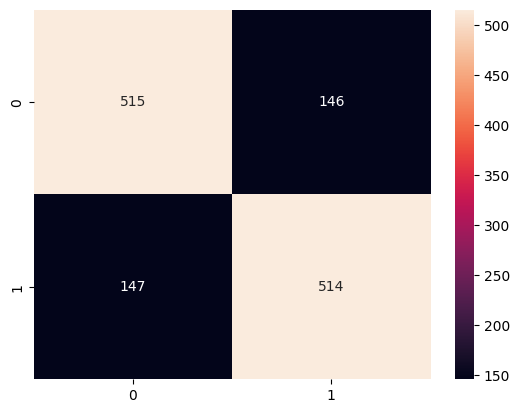

In [5]:
#your code here

bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=100,max_samples=1000,bootstrap=False)

bagging_class.fit(X_train_norm, y_train)

pred = bagging_class.predict(X_test_norm)



print(classification_report(y_test, pred))

sns.heatmap(confusion_matrix(y_test, pred), annot=True,fmt='g')
# confusion_matrix
y_test.value_counts() 
pd.DataFrame(pred).value_counts()


In [6]:
import plotly.express as px
px.imshow(confusion_matrix(y_test, pred), text_auto=True)

In [7]:
#your code here

####to compare Classifier look at f1 score and mostly consider the recall over 0.6 after that you can compare the precision.

bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=100,max_samples=1000)

bagging_class.fit(X_train_norm, y_train)

pred = bagging_class.predict(X_test_norm)


print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       661
           1       0.78      0.78      0.78       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



- Random Forests

In [8]:
#your code here

forest_class = RandomForestClassifier(n_estimators=100,max_depth=20)
forest_class.fit(X_train_norm, y_train)
pred = forest_class.predict(X_test_norm)



print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.79      0.79      0.79       661
           1       0.79      0.79      0.79       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



- Gradient Boosting

In [9]:
#your code here

gb_class = GradientBoostingClassifier(max_depth=20,n_estimators=100)
gb_class.fit(X_train_norm, y_train)

pred = gb_class.predict(X_test_norm)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       661
           1       0.76      0.80      0.78       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



- Adaptive Boosting

In [10]:
#your code here
ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

ada_class.fit(X_train_norm,y_train)

pred = ada_class.predict(X_test_norm)


print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.78      0.75      0.76       661
           1       0.76      0.79      0.77       661

    accuracy                           0.77      1322
   macro avg       0.77      0.77      0.77      1322
weighted avg       0.77      0.77      0.77      1322



Which model is the best and why?

In [11]:
#comment here

#BaggingClassifier is the best as it has highest score...